Text(0.5, 1.0, '$R^2$:0.059')

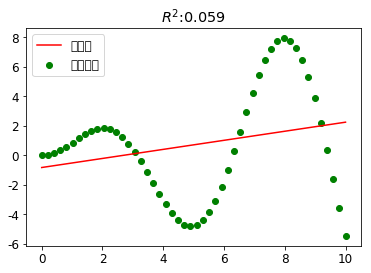

In [17]:
# 欠拟合现象
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import  LinearRegression
plt.rcParams['font.family'] = 'AR PL UKai CN'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

X = np.linspace(0, 10, 50)
y= x * np.sin(x)
X = X[:, np.newaxis]
lr = LinearRegression()
lr.fit(X, y)
plt.scatter(x, y, c='g', label='样本数据')
plt.plot(X, lr.predict(X), 'r-', label='拟合线')
plt.legend()
plt.title(f"$R^2$:{lr.score(X, y):.3f}")

In [29]:
#  多项式拓展
from sklearn.preprocessing import PolynomialFeatures
X = np.array([[1, 2],[3, 4]])
# degree: 扩展的阶数， 阶数越高则输出特征越多.
# include_bias：是否包含偏执。 默认为True
              
poly = PolynomialFeatures(2, include_bias=True)

r = poly.fit_transform(X)
print("转换之后的结果:")
print(r)
print("指数矩阵:")
print(poly.powers_)
print("输入的特征数量:", poly.n_input_features_)
print("输出的特征数量:", poly.n_output_features_)
for x1, x2 in X:
    for e1, e2 in poly.powers_:
        print(x1 ** e1 * x2 ** e2, end='\t')
    print()
        
        

转换之后的结果:
[[ 1.  1.  2.  1.  2.  4.]
 [ 1.  3.  4.  9. 12. 16.]]
指数矩阵:
[[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]]
输入的特征数量: 2
输出的特征数量: 6
1	1	2	1	2	4	
1	3	4	9	12	16	


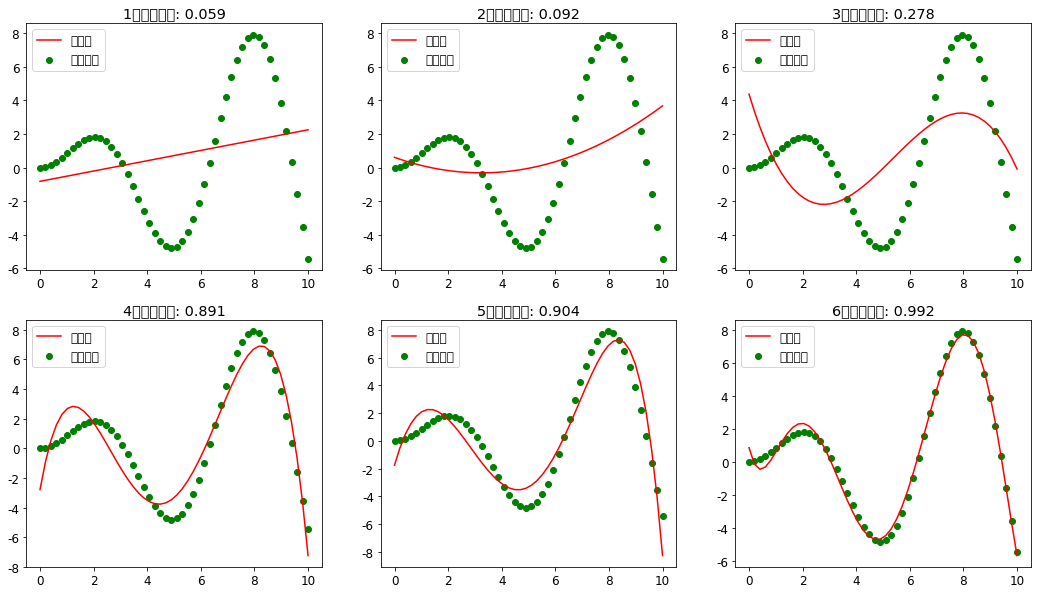

In [42]:
# 解决欠拟合
x = np.linspace(0, 10, 50)
y = x * np.sin(x)
X = x[:, np.newaxis]
figure, ax = plt.subplots(2, 3)
figure.set_size_inches(18, 10)
ax = ax.ravel()
# 进行1 ～ 6 阶的多项式展开
for  n in range(1, 7):
    poly = PolynomialFeatures(degree=n, include_bias=False)
    X_transform = poly.fit_transform(X)
    lr = LinearRegression()
    lr.fit(X_transform, y)
    ax[n - 1].set_title(f"{n}阶，拟合度: {lr.score(X_transform, y):.3f}")
    ax[n - 1].scatter(x, y, c='g', label='样本数据')
    ax[n - 1].plot(x, lr.predict(X_transform), 'r-', label='拟合线')
    ax[n - 1].legend()

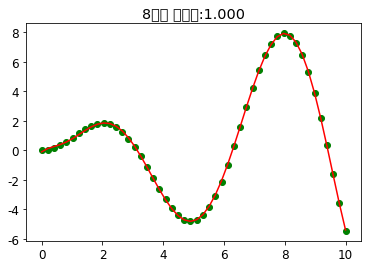

In [52]:
# 流水线
from sklearn.pipeline import Pipeline
x = np.linspace(0, 10, 50)
y = x * np.sin(x)
X = x[:, np.newaxis]
# 定义流水线的 buzhu 类型为一个列表，列表中的每一个元素是元组类型
# 格式为: [(name1, class1), (name2, class2), .... ,(name_N, calss_N)]
steps = [('poly', PolynomialFeatures(include_bias=False)), ('lr', LinearRegression())]
pipe = Pipeline(steps=steps)
# 设置流水线的参数，所有可用的参数， 可以通过 pipline.get_params() 获取
pipe.set_params(poly__degree=8)
pipe.fit(X, y)
score = pipe.score(X, y)
plt.title(f"8阶， 拟合度:{score:.3f}")
plt.scatter(X, y, c='g', label='样本数据')
plt.plot(X, pipe.predict(X), 'r-',label="拟合线")